## Aim of the project
we need to train the dataset using logistic regression, we need to figure out accuracy of our model and use it to predict samples in our test dataset.
1. sepal length
2. Sepal width
3. Petal width
4. Petal width
using the above features we will classify a flower in one of this three categories 
1. setosa
2. versicolour
3. virginica

## Lets import all necessary libraries at once

In [19]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Load the Iris dataset
iris = load_iris()


In [2]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [21]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

## Creating a DataFrame from the dataset

In [9]:
# Creating a DataFrame from the dataset
iris_df = pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                       columns=iris['feature_names'] + ['target'])

# Display the first few rows of the dataset
print(iris_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0  


In [24]:
# Selecting features and target variable as X and y
X = iris_df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
y = iris_df['target']

In [26]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [28]:
# Training the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [33]:
# Lets make predictions on the test set
model.predict(X_test)

array([1., 0., 2., 1., 1., 0., 1., 2., 1., 1., 2., 0., 0., 0., 0., 1., 2.,
       1., 1., 2., 0., 2., 0., 2., 2., 2., 2., 2., 0., 0.])

In [34]:
my_model = model.predict(X_test)

In [35]:
# Calculating accuracy
accuracy = accuracy_score(y_test, my_model)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


In [40]:
# Displaying confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, my_model)
class_report = classification_report(y_test, my_model)

In [42]:
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [43]:
print("\nClassification report:")
print(class_report)


Classification report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       1.00      1.00      1.00         9
         2.0       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## Result
The results you've obtained indicate excellent performance of the logistic regression model on the Iris dataset. Let's break down the key metrics:

Accuracy: 1.00

The accuracy of 1.00 (100%) suggests that the model correctly classified all instances in the test set.

Confusion Matrix:
Each row in the confusion matrix represents the true class, and each column represents the predicted class. The diagonal elements (from top-left to bottom-right) show the correct predictions for each class. In this case, all values outside the diagonal are zeros, indicating perfect predictions.

Classification Report:
Precision, recall, and F1-score are all perfect (1.00) for each class. The macro and weighted averages are also 1.00, indicating overall excellent performance across all classes.

In summary, the logistic regression model achieved 100% accuracy,  correctly classifying all instances in the test set. These results suggest that the model has learned the patterns in the data very well. However, it's worth noting that obtaining perfect accuracy on a dataset might indicate potential overfitting, especially if the dataset is relatively small.

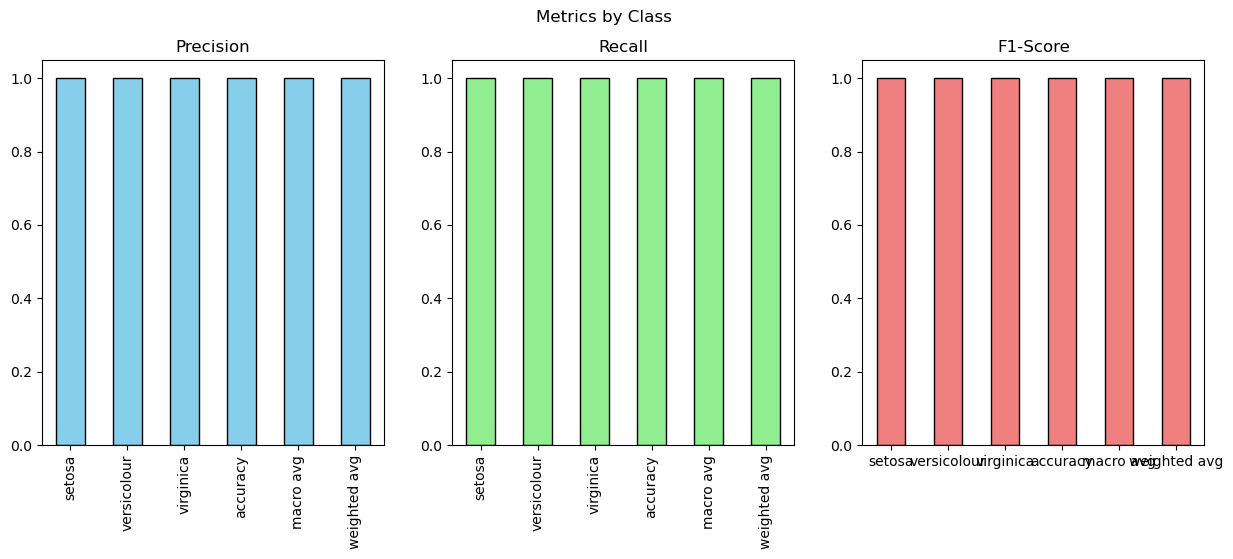

In [50]:
# Function to visualize precision, recall, and F1-score for each class
def plot_metrics(y_true, y_pred, class_names):
    metrics = classification_report(y_true, y_pred, target_names=class_names, output_dict=True)
    metrics_df = pd.DataFrame(metrics).T.iloc[:, :-1]

    # Plotting
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
    
    # Plot precision
    metrics_df['precision'].plot(kind='bar', ax=axes[0], color='skyblue', edgecolor='black', legend=False)
    axes[0].set_title('Precision')
    
    # Plot recall
    metrics_df['recall'].plot(kind='bar', ax=axes[1], color='lightgreen', edgecolor='black', legend=False)
    axes[1].set_title('Recall')
    
    # Plot F1-score
    metrics_df['f1-score'].plot(kind='bar', ax=axes[2], color='lightcoral', edgecolor='black', legend=False)
    axes[2].set_title('F1-Score')
    
    fig.suptitle('Metrics by Class')
    plt.xticks(rotation=0)
    plt.show()

# Specify the class names
class_names = ['setosa', 'versicolour', 'virginica']

# Plot precision, recall, and F1-score for each class
plot_metrics(y_test, my_model, class_names)
